In [1]:
# Bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import load_model
import pickle
import tensorflow as tf
 

In [2]:
# Ruta del conjunto de datos de entrenamiento
train_path = r'C:\Users\migue\Desktop\Fruit-360\fruits-360_dataset\fruits-360\Training'

# Ruta del conjunto de datos de prueba
test_path = r'C:\Users\migue\Desktop\Fruit-360\fruits-360_dataset\fruits-360\Test'

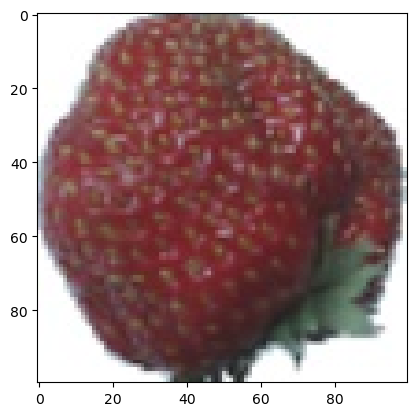

In [3]:
img=load_img(train_path + "/Strawberry Wedge/1_100.jpg")
plt.imshow(img)
plt.axis("on")
plt.show()

In [4]:
img=img_to_array(img)
img.shape

(100, 100, 3)

In [5]:
# Crear el modelo secuencial
model = Sequential()

# Capas de convolución y pooling
model.add(Conv2D(128, 3, activation="relu", input_shape=(100, 100, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64, 3, activation="relu"))
model.add(Conv2D(32, 3, activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))

# Capa de dropout para reducir el sobreajuste
model.add(Dropout(0.5))

# Aplanar las salidas y añadir capas densas
model.add(Flatten())
model.add(Dense(5000, activation="relu"))
model.add(Dense(1000, activation="relu"))

# Añadir la capa de salida
model.add(Dense(131, activation="softmax"))

# Imprimir el resumen de la arquitectura del modelo
model.summary()

C:\Users\migue\anaconda3\envs\SIC-Python-3.9.7\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 22, 22, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 15488)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5000)           │    77,445,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1000)           │     5,001,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 131)            │       131,131 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 82,672,971 (315.37 MB)

 Trainable params: 82,672,971 (315.37 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.3,
                                   horizontal_flip=True,
                                   vertical_flip=False,
                                   zoom_range = 0.3
                                   )

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=(100, 100),
                                                    batch_size=64,
                                                    color_mode="rgb",
                                                    class_mode="categorical")

test_generator = test_datagen.flow_from_directory(test_path,
                                                  target_size=(100, 100),
                                                  batch_size=64,
                                                  color_mode="rgb",
                                                  class_mode="categorical")


Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [7]:
model.compile(loss="categorical_crossentropy", optimizer = "SGD" , metrics = ["accuracy"]) 

In [9]:
history = model.fit(train_generator, 
                 steps_per_epoch=128,
                 epochs=50,
                 validation_data=test_generator,
                 validation_steps=65)

# Guardar el historial de entrenamiento
with open('training_history2.pkl', 'wb') as file:
    pickle.dump(history.history, file)


Epoch 1/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.0075 - loss: 4.8691 - val_accuracy: 0.0168 - val_loss: 4.8228
Epoch 2/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.0160 - loss: 4.8158 - val_accuracy: 0.0608 - val_loss: 4.5744
Epoch 3/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 153s 1s/step - accuracy: 0.0545 - loss: 4.4910 - val_accuracy: 0.1344 - val_loss: 3.5873
Epoch 4/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 182s 1s/step - accuracy: 0.1225 - loss: 3.5931 - val_accuracy: 0.3562 - val_loss: 2.6353
Epoch 5/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 163s 1s/step - accuracy: 0.2234 - loss: 2.9727 - val_accuracy: 0.3986 - val_loss: 2.1916
Epoch 6/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 126s 984ms/step - accuracy: 0.3277 - loss: 2.4299 - val_accuracy: 0.5424 - val_loss: 1.6915
Epoch 7/50


C:\Users\migue\anaconda3\envs\SIC-Python-3.9.7\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


128/128 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.4056 - loss: 2.1035 - val_accuracy: 0.3118 - val_loss: 2.4435
Epoch 8/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.4781 - loss: 1.7939 - val_accuracy: 0.5858 - val_loss: 1.3601
Epoch 9/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 44s 338ms/step - accuracy: 0.5599 - loss: 1.4373 - val_accuracy: 0.7137 - val_loss: 1.0029
Epoch 10/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.5737 - loss: 1.4840 - val_accuracy: 0.7156 - val_loss: 0.9687
Epoch 11/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.6412 - loss: 1.1536 - val_accuracy: 0.7606 - val_loss: 0.8402
Epoch 12/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.6891 - loss: 0.9861 - val_accuracy: 0.7744 - val_loss: 0.8512
Epoch 13/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.6855 - loss: 1.0838 - val_accuracy: 0.8000 - val_loss: 0.6683
Epoch 14/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 125s 975ms/step - accuracy: 0.7317 - loss: 0.8479 - val_accur

In [7]:
import tensorflow as tf
# Crear el conjunto de datos de prueba con preprocesamiento adecuado
test_set = tf.keras.utils.image_dataset_from_directory(
    r'C:\Users\migue\Desktop\Fruit-360\fruits-360_dataset\fruits-360\Test',
    labels="inferred",
    label_mode="categorical",
    image_size=(100, 100),
    batch_size=64,
    shuffle=True
)



class_names = test_set.class_names
print("Clases inferidas:", class_names)

# Normalizar las imágenes del conjunto de datos de prueba
normalization_layer = tf.keras.layers.Rescaling(1./255)
test_set = test_set.map(lambda x, y: (normalization_layer(x), y))

Found 22688 files belonging to 131 classes.
Clases inferidas: ['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Ma

In [130]:
loss, accuracy = model.evaluate(test_set)

355/355 ━━━━━━━━━━━━━━━━━━━━ 73s 205ms/step - accuracy: 0.9670 - loss: 0.1277


CARGANDO EL MODELO

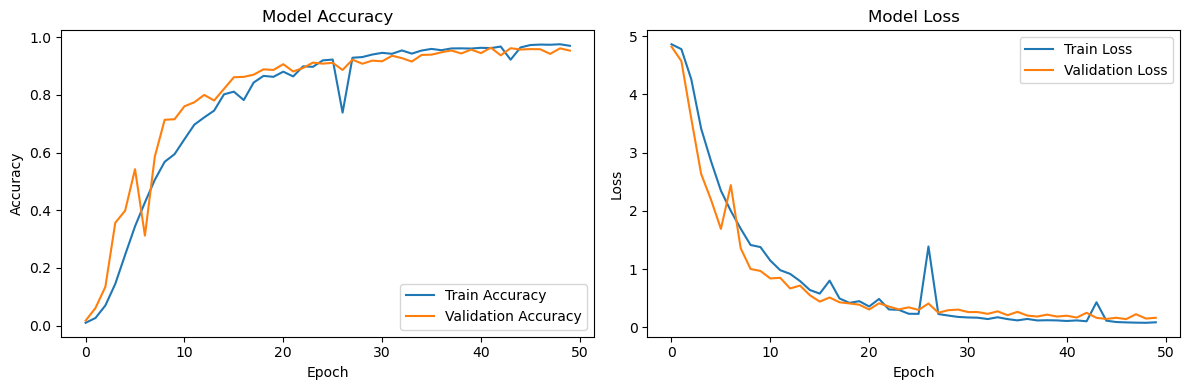

In [10]:

with open('training_history2.pkl', 'rb') as file:
    hist = pickle.load(file)

# Generar las gráficas
plt.figure(figsize=(12, 4))

# Gráfica de precisión
plt.subplot(1, 2, 1)
plt.plot(hist['accuracy'], label='Train Accuracy')
plt.plot(hist['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Gráfica de pérdida
plt.subplot(1, 2, 2)
plt.plot(hist['loss'], label='Train Loss')
plt.plot(hist['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
model.save(r'C:\Users\migue\Desktop\Universidad\SIC\Modelo_Entrenado_Frutas4.keras')
model.save(r'C:\Users\migue\Desktop\Universidad\SIC\Modelo_Entrenado_Frutas4.h5')
